# 800t Simulation Demo

This notebook demonstrates the steps to take to simulate the 800t look on a RAW digital image captured from our g81 camera

In [2]:
%load_ext autoreload
%autoreload 2
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from digitalimage import DigitalImage
from colortransfer import ColorTransfer
from linearization import LinearExponential
from grain_rendering import grain_interface

## Import RAW digital file

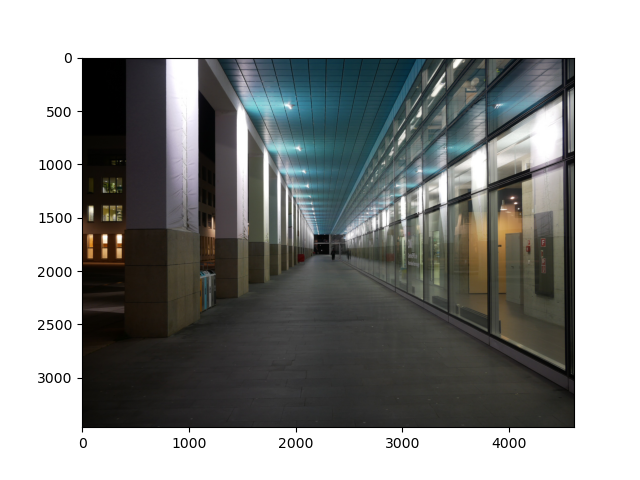

In [6]:
digital_img = DigitalImage("dataset\digital\P1480512.RW2", 2)
plt.figure()
plt.imshow(digital_img.thumbnail)

## Apply Halation

In [8]:
# Todo Halation
halated = digital_img.raw

## Apply Color Transfer Function

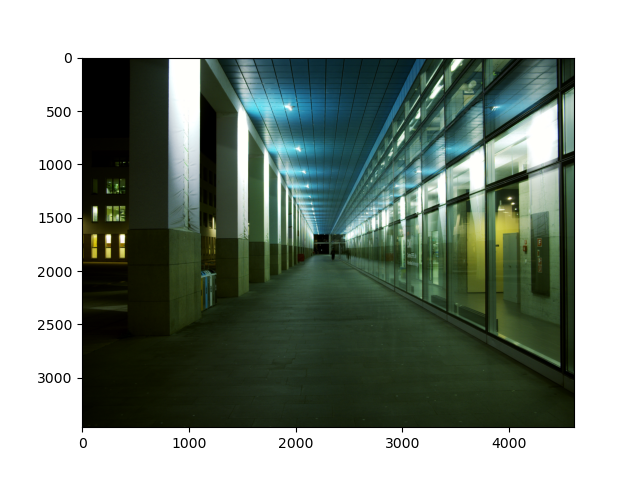

In [9]:
# import color transfer function
TE226_ctf = ColorTransfer.load("color_transfer_data/transfer_functions/TE226.ctf")

# import linearization function
TE226_lfn = LinearExponential.load("color_transfer_data/linearization_functions/TE226.lfn")

# should take around 15s
transferred = TE226_ctf.apply(halated, TE226_lfn.apply_inv)

plt.figure()
plt.imshow(transferred)

## Add grain

In [10]:
grained = grain_interface(transferred)

## Save image

In [11]:
path = "out.png"
Image.fromarray(np.uint8(grained*255)).save(path)